1. Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2. Data Loading

In [2]:
df = pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


3. Data Preprocessing

In [ ]:
df = df.astype({'Quantity': 'int64', 'UnitPrice': 'float64', 'SalePrice': 'float64'})

In [58]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(num_col) 

['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [6]:
obj_col = df.select_dtypes(include=['object']).columns.tolist()
print(obj_col)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [167]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

4. Data Eksplore

In [107]:
df_new = df.copy()

In [108]:
df_new['Net Price'] = df_new['Unit price']*df_new['Quantity']

In [109]:
df_new

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Net Price
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,65.82


In [110]:
column_move = df_new.pop('Net Price')
df_new1 = df_new.insert(8, "Net Price", column_move)

In [125]:
df_new

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Net Price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,40.35,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,973.80,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,31.84,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,65.82,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [124]:
df_new['Date']=pd.to_datetime(df_new['Date'])

In [128]:
df_new['Date'].value_counts().sort_index()

2019-01-01    12
2019-01-02     8
2019-01-03     8
2019-01-04     6
2019-01-05    12
              ..
2019-03-26    13
2019-03-27    10
2019-03-28    10
2019-03-29     8
2019-03-30    11
Name: Date, Length: 89, dtype: int64

In [7]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [24]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [79]:
ab = pd.DataFrame(df.groupby(['Product line'])['Rating'].mean())
ab

,Rating
Product line,
Electronic accessories,6.924706
Fashion accessories,7.029213
Food and beverages,7.113218
Health and beauty,7.003289
Home and lifestyle,6.837500
Sports and travel,6.916265


In [130]:
branch_gi = pd.DataFrame(df_new.groupby(['City'])['Total'].sum())
branch_gi

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


<AxesSubplot:xlabel='City', ylabel='Total'>

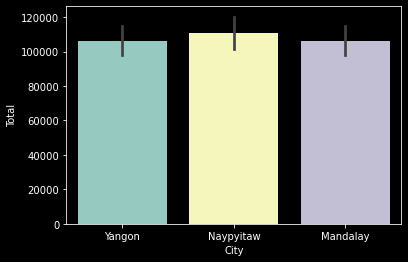

In [136]:
sns.barplot(x='City', y='Total', data=df_new, estimator=sum)

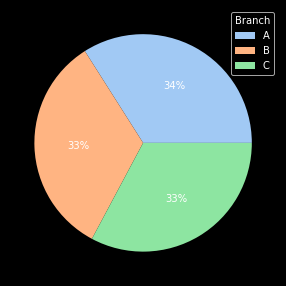

In [181]:
branch_count = df['Branch'].value_counts()
colors = sns.color_palette('pastel')

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(branch_count.values,labels=branch_count.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax.legend(title='Branch')
plt.show()

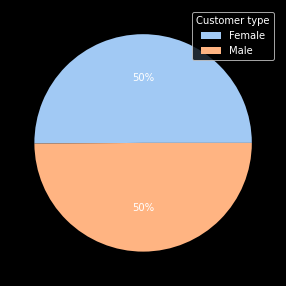

In [182]:
branch_count = df_new['Gender'].value_counts()
colors = sns.color_palette('pastel')

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(branch_count.values,labels=branch_count.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax.legend(title='Customer type')
plt.show()

In [135]:
mnonm = pd.DataFrame(df_new.groupby(['Customer type'])['Total'].mean())
mnonm 

,Total
Customer type,
Member,327.791305
Normal,318.122856


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

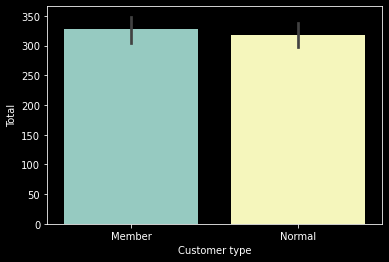

In [137]:
sns.barplot(x='Customer type', y='Total', data=df_new)

In [177]:
member_payment = pd.crosstab(df_new["Payment"], df_new["Customer type"])
member_payment

Customer type,Member,Normal
Payment,,
Cash,168,176
Credit card,172,139
Ewallet,161,184


In [178]:
member_payment['Member'].mean()

167.0

In [ ]:
member_payment1 = pd.DataFrame(df.groupby(['Product line'])['Rating'].mean())
member_payment1

In [150]:
df_new2 = df_new[(df_new['Date'] <= '2019-12-31')]
df_new2

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Net Price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,40.35,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,973.80,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,31.84,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,65.82,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


data_jakarta.groupby(by=[data_jakarta.index.month,data_jakarta.index.year])['New Cases'].mean()

In [151]:
df_new2.index = df_new2['Date']

In [169]:
# df_new2.to_csv('data.csv', index=False)
df_new2

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Net Price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,40.35,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,973.80,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,31.84,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7


In [173]:
daily_total = pd.DataFrame(df_new2.groupby(by=[df_new2.index.month, df_new2.index.day])['Total'].sum())
daily_total

Total
Date Date           
1    1     4745.1810
     2     1945.5030
     3     2078.1285
     4     1623.6885
     5     3536.6835
...              ...
3    26    1962.5130
     27    2902.8195
     28    2229.4020
     29    4023.2430
     30    4487.0595

[89 rows x 1 columns]

In [159]:
sorted_mem = df_new.sort_values(by='Date',ascending=True).groupby(['Date']).sum()
sorted_mem

,Unit price,Quantity,Net Price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,
2019-01-01,659.95,81,4519.22,225.9610,4745.1810,4519.22,57.142857,225.9610,79.0
2019-01-02,357.08,48,1852.86,92.6430,1945.5030,1852.86,38.095238,92.6430,48.4
2019-01-03,475.66,37,1979.17,98.9585,2078.1285,1979.17,38.095238,98.9585,64.9
2019-01-04,310.46,32,1546.37,77.3185,1623.6885,1546.37,28.571429,77.3185,39.1
2019-01-05,739.64,55,3368.27,168.4135,3536.6835,3368.27,57.142857,168.4135,89.2
...,...,...,...,...,...,...,...,...,...
2019-03-26,558.64,52,1869.06,93.4530,1962.5130,1869.06,61.904762,93.4530,86.1
2019-03-27,568.41,45,2764.59,138.2295,2902.8195,2764.59,47.619048,138.2295,67.6
2019-03-28,455.25,48,2123.24,106.1620,2229.4020,2123.24,47.619048,106.1620,70.5


5. Hipotesis Testing

In [140]:
tes_hp = pd.crosstab(df_new["Product line"], df_new["Gender"])
tes_hp

Gender,Female,Male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [141]:
stat, p, dof, expected = stats.chi2_contingency(tes_hp)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.332
Probably independent
